In [1]:
import numpy as np 
from matplotlib import pyplot as plt
from Sampler import sampler
from scipy.stats import kstest

# Алгоритм Метрополиса-Хаслинга

Очередная итерация начинается с состояния x(i). Выбрать x ′ по распределению q(x ′; x(i)).
  Вычислить
a = p∗(x′) q(x(i);x′)/ p∗(x(i))q(x′;x(i))
   С вероятностью a (1, если a ≥ 1) x(i+1) := x ′, иначе x(i+1) := x(i).

## Пример 1

In [40]:
def f(x):
    return (np.exp(-(x+3)**2/0.5)).sum()/1.25331

In [45]:
sm = sampler(f, bounds = np.array([-12, 12]), shift = 0.9)

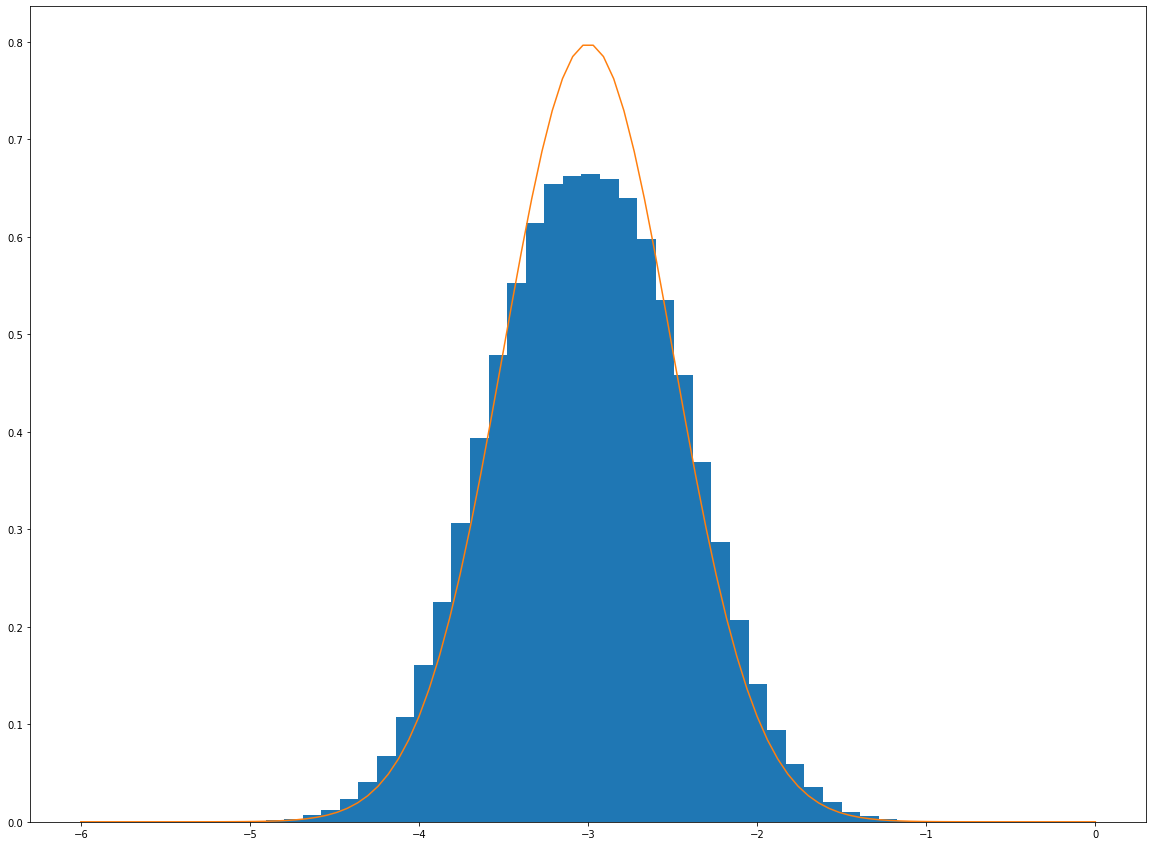

In [46]:
plt.figure(figsize = (20, 15))
v = sm.gen(1000000, d = 1)
x = np.linspace(-6, 0, 100)
plt.hist(v, bins = 50, density = True)
plt.plot(x, [f(i) for i in x])
plt.show()

## Пример 2

In [59]:
def g(x):
    return ((x < 10)&(x > -10))/20

def g_cdf(x):
    return ((x <= 10)&(x >= -10))/20*(x+10)

In [64]:
sm = sampler(g, bounds = np.array([-12, 12]), shift = 0.95)

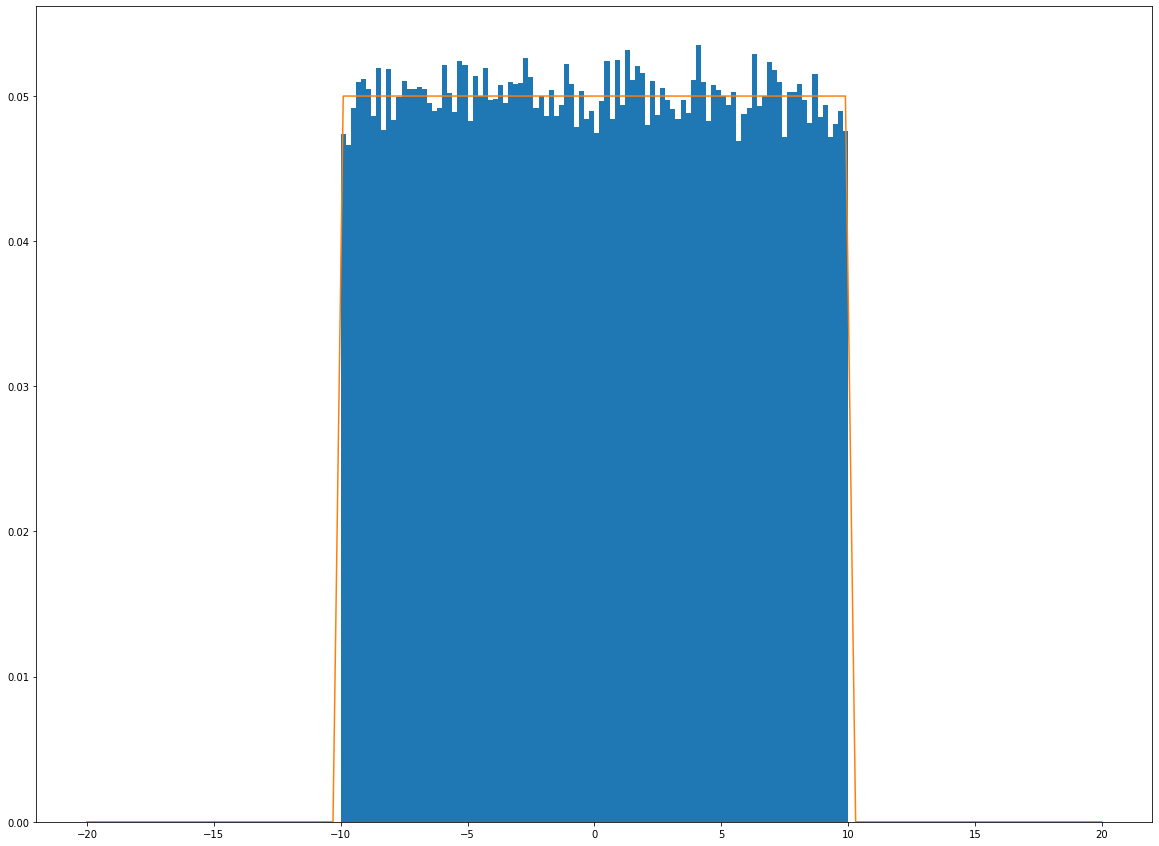

In [65]:
plt.figure(figsize = (20, 15))
v = sm.gen(100000, d = 1)
x = np.linspace(-20, 20, 100)
plt.hist(v, bins = 100, density = True)
plt.plot(x, [g(i) for i in x])
plt.show()

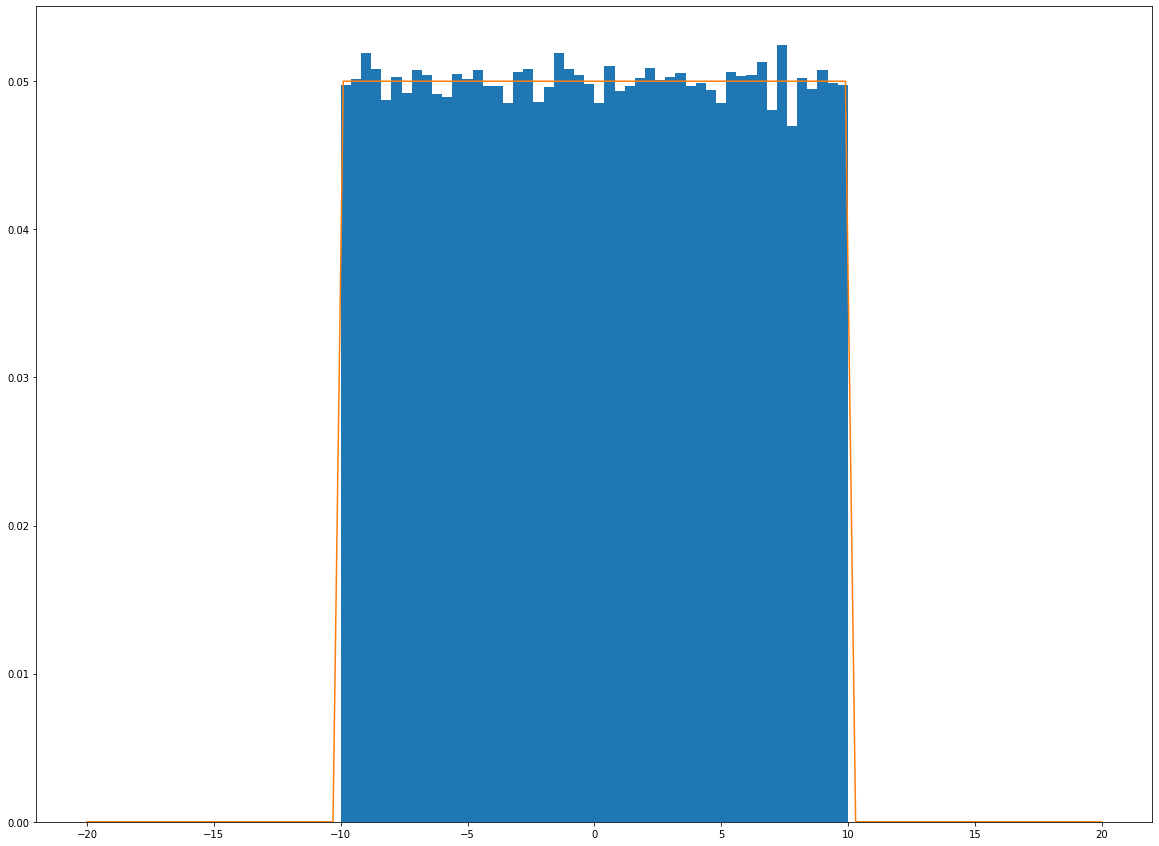

In [23]:
plt.figure(figsize = (20, 15))
v = np.random.rand(100000)
x = np.linspace(-20, 20, 100)
plt.hist((v-0.5)*20, bins = 50, density = True)
plt.plot(x, [g(i) for i in x])
plt.show()

Проверка принадлежности выборки данному распределению с помощью критерия Колмогорова

In [66]:
kstest(v, g_cdf)

KstestResult(statistic=0.0026267550572820486, pvalue=0.49516836101921)

## Пример 3

In [48]:
def t(x):
    return ((np.exp(-(x+0.5)**2/0.5)).sum() + (np.exp(-(x-1)**2/0.1)).sum())/2

In [53]:
sm = sampler(t, bounds = np.array([-4, 4]), shift = 0.5)

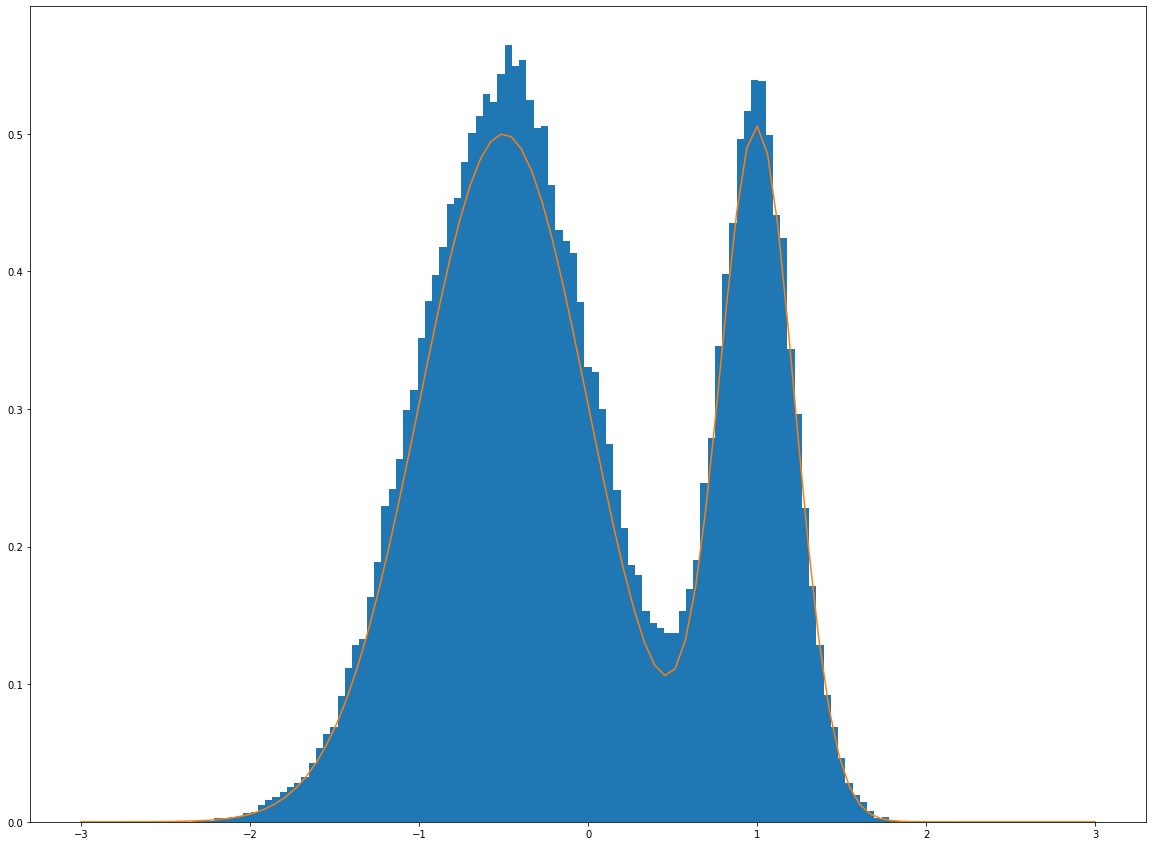

In [54]:
plt.figure(figsize = (20, 15))
v = sm.gen(100000, d = 10)
x = np.linspace(-3, 3, 100)
plt.hist(v, bins = 100, density = True)
plt.plot(x, [t(i) for i in x])
plt.show()

## Пример 4 

In [55]:
def l(x):
    return ((np.exp(-(x+3)**2/0.5)).sum() + (np.exp(-(x-5)**2/0.1)).sum())/2

In [56]:
sm = sampler(l, bounds = np.array([-6, 7]), shift = 0.5)

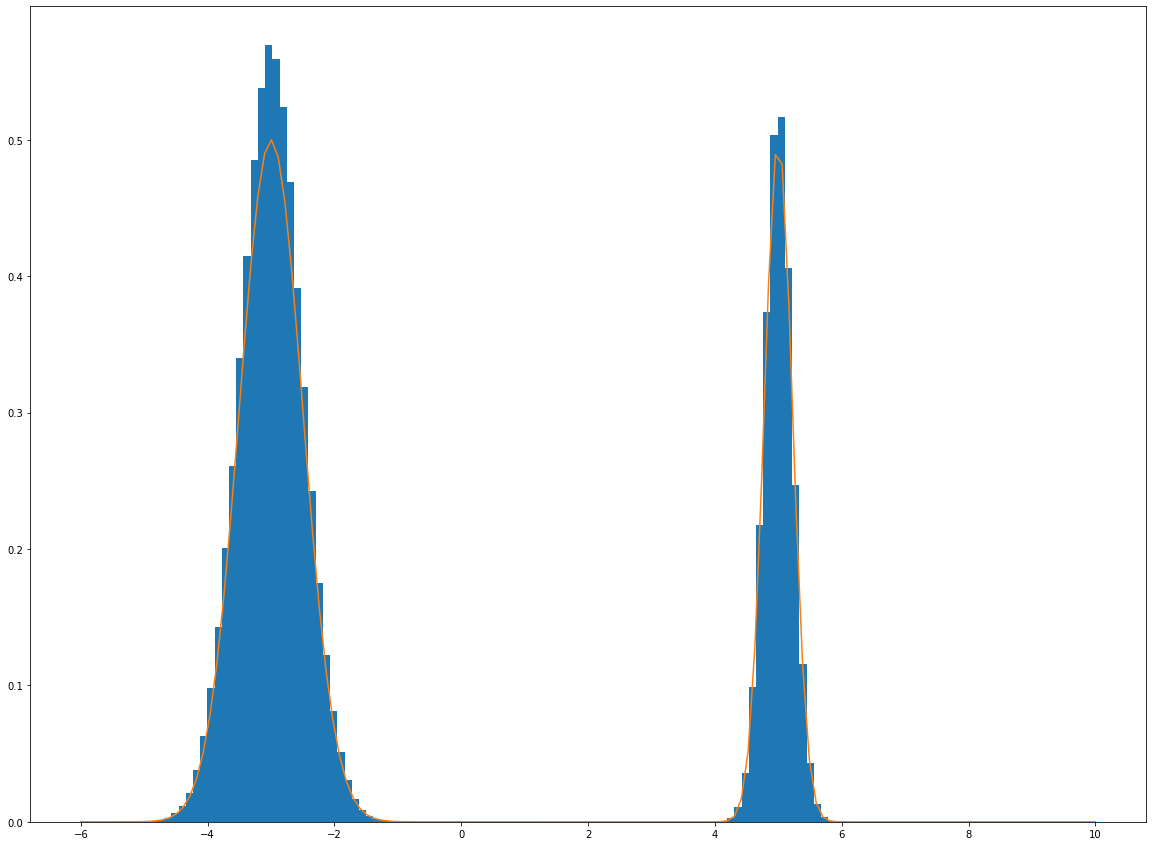

In [57]:
plt.figure(figsize = (20, 15))
v = sm.gen(1000q000, d = 10)
x = np.linspace(-6, 10, 150)
plt.hist(v, bins = 100, density = True)
plt.plot(x, [l(i) for i in x])
plt.show()

## Премер 5

In [78]:
def u(x):
    return 0.25*(((x < 5) & (x > 1))*(x-1)/8 +  ((x < 9) & (x >= 5))*(9-x)/8 + ((x < -1) & (x > -5))*(-x-1)/8 +  ((x < -5) & (x >= -9))*(9+x)/8)

In [79]:
sm = sampler(u, bounds = np.array([-10, 10]), shift = 0.5)

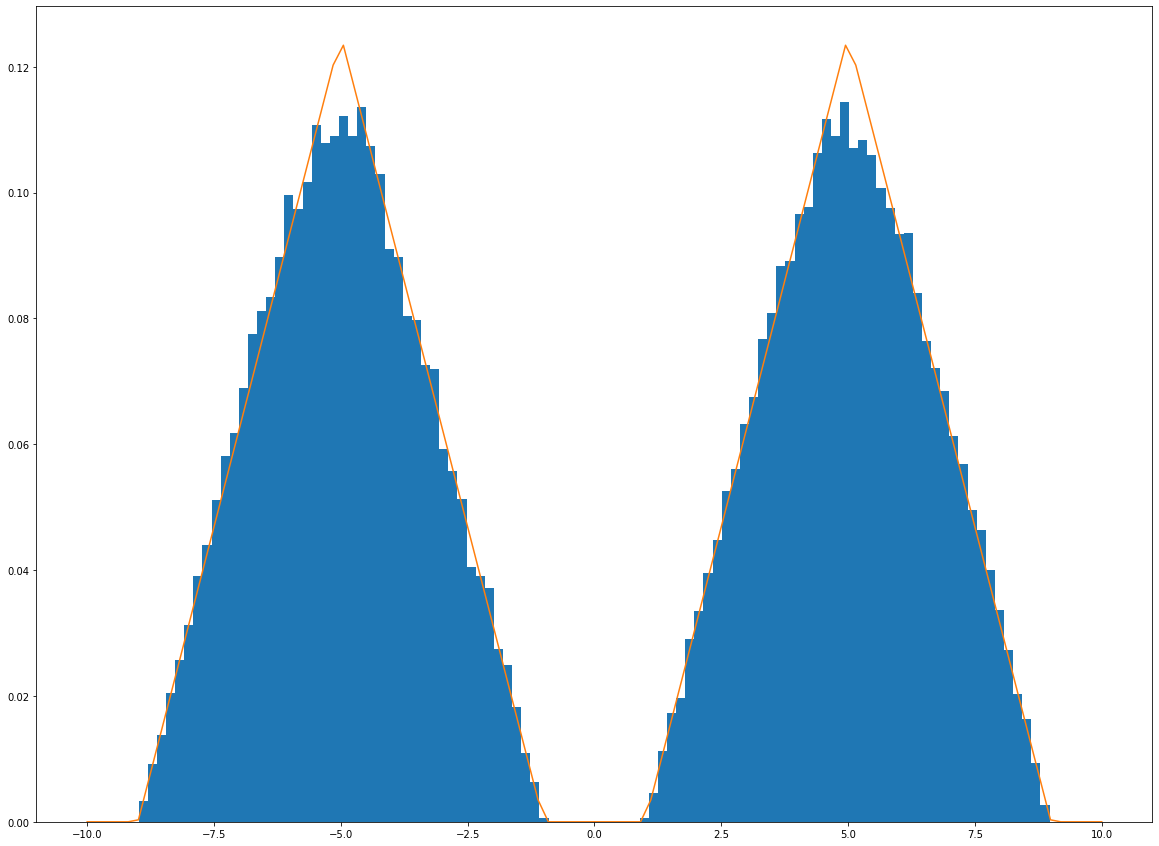

In [81]:
plt.figure(figsize = (20, 15))
v = sm.gen(100000, d = 1)
x = np.linspace(-10, 10, 100)
plt.hist(v, bins = 100, density = True)
plt.plot(x, [u(i) for i in x])
plt.show()